In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import csv
import math
import seaborn as sns


## Random eda on 9/11

In [3]:
noncancelled_df = pd.read_csv("data/categorised_NONcancelled_flights_incomplete.csv")
noncancelled_df.head()

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,DepDelay.1,DepDelay.2,DepDelay.3,ArrTime,DepTime,CRSArrTime,...,Dest,DestAirportName,DestState,TaxiIn,TaxiOut,TailNum,UniqueCarrier,CarrierName,FlightNum,Date
0,19.0,NaN,-2.0,0.0,0.0,0.0,0.0,1404.0,1345.0,1406,...,BZN,Bozeman Yellowstone International,MT,NaN,NaN,NaN,DL,Delta Air Lines Inc.,1807,01/01/1988
1,49.0,NaN,-6.0,0.0,0.0,0.0,0.0,1359.0,1310.0,1405,...,ABE,Lehigh Valley International,PA,NaN,NaN,NaN,US,US Airways Inc.,312,01/01/1988
2,26.0,NaN,2.0,0.0,0.0,0.0,0.0,1536.0,1510.0,1534,...,SDF,Louisville Muhammad Ali International,KY,NaN,NaN,NaN,DL,Delta Air Lines Inc.,1060,01/01/1988
3,31.0,NaN,-2.0,-3.0,-3.0,-3.0,-3.0,1253.0,1222.0,1255,...,SYR,Syracuse Hancock International,NY,NaN,NaN,NaN,PI,NaN,874,01/01/1988
4,161.0,NaN,19.0,0.0,0.0,0.0,0.0,1051.0,910.0,1032,...,STL,St Louis Lambert International,MO,NaN,NaN,NaN,TW,NaN,245,01/01/1988


In [4]:
cancelled_df = pd.read_csv("data/categorised_cancelled_flights_incomplete.csv")
cancelled_df.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ActualElapsedTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,CarrierDelay,LateAircraftDelay,SecurityDelay,WeatherDelay,NASDelay,...,OriginAirportName,OriginState,Dest,DestAirportName,DestState,TailNum,UniqueCarrier,CarrierName,FlightNum,Date
0,NaN,835,740,115.0,NaN,NaN,NaN,NaN,NaN,NaN,...,John Glenn Columbus International,OH,MSP,Minneapolis-St Paul International,MN,NaN,NW,NaN,681,1987-10-01
1,NaN,2115,2000,75.0,NaN,NaN,NaN,NaN,NaN,NaN,...,San Francisco International,CA,LAX,Los Angeles International,CA,NaN,AA,American Airlines Inc.,2128,1987-10-01
2,NaN,1450,1340,70.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Bob Hope,CA,OAK,Metropolitan Oakland International,CA,NaN,AS,Alaska Airlines Inc.,715,1987-10-01
3,NaN,1440,1355,105.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Cleveland-Hopkins International,OH,MEM,Memphis International,TN,NaN,NW,NaN,881,1987-10-01
4,NaN,2359,2300,59.0,NaN,NaN,NaN,NaN,NaN,NaN,...,San Francisco International,CA,LAX,Los Angeles International,CA,NaN,PS,NaN,1436,1987-10-01


In [35]:
noncancelled_df['Date'] = pd.to_datetime(noncancelled_df['Date'])
noncancelled_df_2001 = noncancelled_df[noncancelled_df['Date'].dt.year == 2001]

In [36]:
cancelled_df['Date'] = pd.to_datetime(cancelled_df['Date'])
cancelled_df_2001 = cancelled_df[cancelled_df['Date'].dt.year == 2001]

In [37]:
cancelled_df2 = cancelled_df.groupby([cancelled_df['Date'].dt.year, 'Dest', 'DestAirportName', 'DestState']).size()
cancelled_df2 = cancelled_df2.reset_index(name='Cancelled Flights')
cancelled_df2

,Date,Dest,DestAirportName,DestState,Cancelled Flights
0,1987,ABE,Lehigh Valley International,PA,1
1,1987,ABQ,Albuquerque International Sunport,NM,7
2,1987,AGS,Augusta Regional at Bush Field,GA,3
3,1987,ALB,Albany International,NY,5
4,1987,ALO,Waterloo Regional,IA,1
...,...,...,...,...,...
4567,2008,VPS,Eglin AFB Destin Fort Walton Beach,FL,13
4568,2008,WRG,Wrangell Airport,AK,5
4569,2008,XNA,Northwest Arkansas Regional,AR,45
4570,2008,YAK,Yakutat Airport,AK,1


In [38]:
noncancelled_df2 = noncancelled_df.groupby([noncancelled_df['Date'].dt.year, 'Dest', 'DestAirportName', 'DestState']).size()
noncancelled_df2 = noncancelled_df2.reset_index(name='Noncancelled Flights')
noncancelled_df2

,Date,Dest,DestAirportName,DestState,Noncancelled Flights
0,1987,ABE,Lehigh Valley International,PA,97
1,1987,ABQ,Albuquerque International Sunport,NM,625
2,1987,ACV,California Redwood Coast Humboldt County,CA,22
3,1987,AGS,Augusta Regional at Bush Field,GA,74
4,1987,ALB,Albany International,NY,242
...,...,...,...,...,...
5129,2008,WRG,Wrangell Airport,AK,55
5130,2008,WYS,Yellowstone,MT,20
5131,2008,XNA,Northwest Arkansas Regional,AR,1071
5132,2008,YAK,Yakutat Airport,AK,59


In [28]:
merged_df = pd.merge(cancelled_df2, noncancelled_df2, how='left', on=['Date', 'Dest', 'DestAirportName', 'DestState'])
merged_df

,Date,Dest,DestAirportName,DestState,Cancelled Flights,Noncancelled Flights
0,1987,ABE,Lehigh Valley International,PA,1,97
1,1987,ABQ,Albuquerque International Sunport,NM,7,625
2,1987,AGS,Augusta Regional at Bush Field,GA,3,74
3,1987,ALB,Albany International,NY,5,242
4,1987,ALO,Waterloo Regional,IA,1,26
...,...,...,...,...,...,...
4567,2008,VPS,Eglin AFB Destin Fort Walton Beach,FL,13,510
4568,2008,WRG,Wrangell Airport,AK,5,55
4569,2008,XNA,Northwest Arkansas Regional,AR,45,1071
4570,2008,YAK,Yakutat Airport,AK,1,59


In [30]:
merged_df['Total Flights'] = merged_df['Cancelled Flights'] + merged_df['Noncancelled Flights']
merged_df

,Date,Dest,DestAirportName,DestState,Cancelled Flights,Noncancelled Flights,Total Flights
0,1987,ABE,Lehigh Valley International,PA,1,97,98
1,1987,ABQ,Albuquerque International Sunport,NM,7,625,632
2,1987,AGS,Augusta Regional at Bush Field,GA,3,74,77
3,1987,ALB,Albany International,NY,5,242,247
4,1987,ALO,Waterloo Regional,IA,1,26,27
...,...,...,...,...,...,...,...
4567,2008,VPS,Eglin AFB Destin Fort Walton Beach,FL,13,510,523
4568,2008,WRG,Wrangell Airport,AK,5,55,60
4569,2008,XNA,Northwest Arkansas Regional,AR,45,1071,1116
4570,2008,YAK,Yakutat Airport,AK,1,59,60


In [32]:
merged_df['Percentage of cancelled'] = merged_df['Cancelled Flights'] / merged_df['Total Flights'] * 100
merged_df

,Date,Dest,DestAirportName,DestState,Cancelled Flights,Noncancelled Flights,Total Flights,Percentage of cancelled
0,1987,ABE,Lehigh Valley International,PA,1,97,98,1.020408
1,1987,ABQ,Albuquerque International Sunport,NM,7,625,632,1.107595
2,1987,AGS,Augusta Regional at Bush Field,GA,3,74,77,3.896104
3,1987,ALB,Albany International,NY,5,242,247,2.024291
4,1987,ALO,Waterloo Regional,IA,1,26,27,3.703704
...,...,...,...,...,...,...,...,...
4567,2008,VPS,Eglin AFB Destin Fort Walton Beach,FL,13,510,523,2.485660
4568,2008,WRG,Wrangell Airport,AK,5,55,60,8.333333
4569,2008,XNA,Northwest Arkansas Regional,AR,45,1071,1116,4.032258
4570,2008,YAK,Yakutat Airport,AK,1,59,60,1.666667


In [ ]:
# merged_df.drop(columns=['Noncancelled Flights'], inplace=True)

In [49]:
merged_df.columns.to_list()

['Date',
 'Dest',
 'DestAirportName',
 'DestState',
 'Cancelled Flights',
 'Noncancelled Flights',
 'Total Flights',
 'Percentage of cancelled']

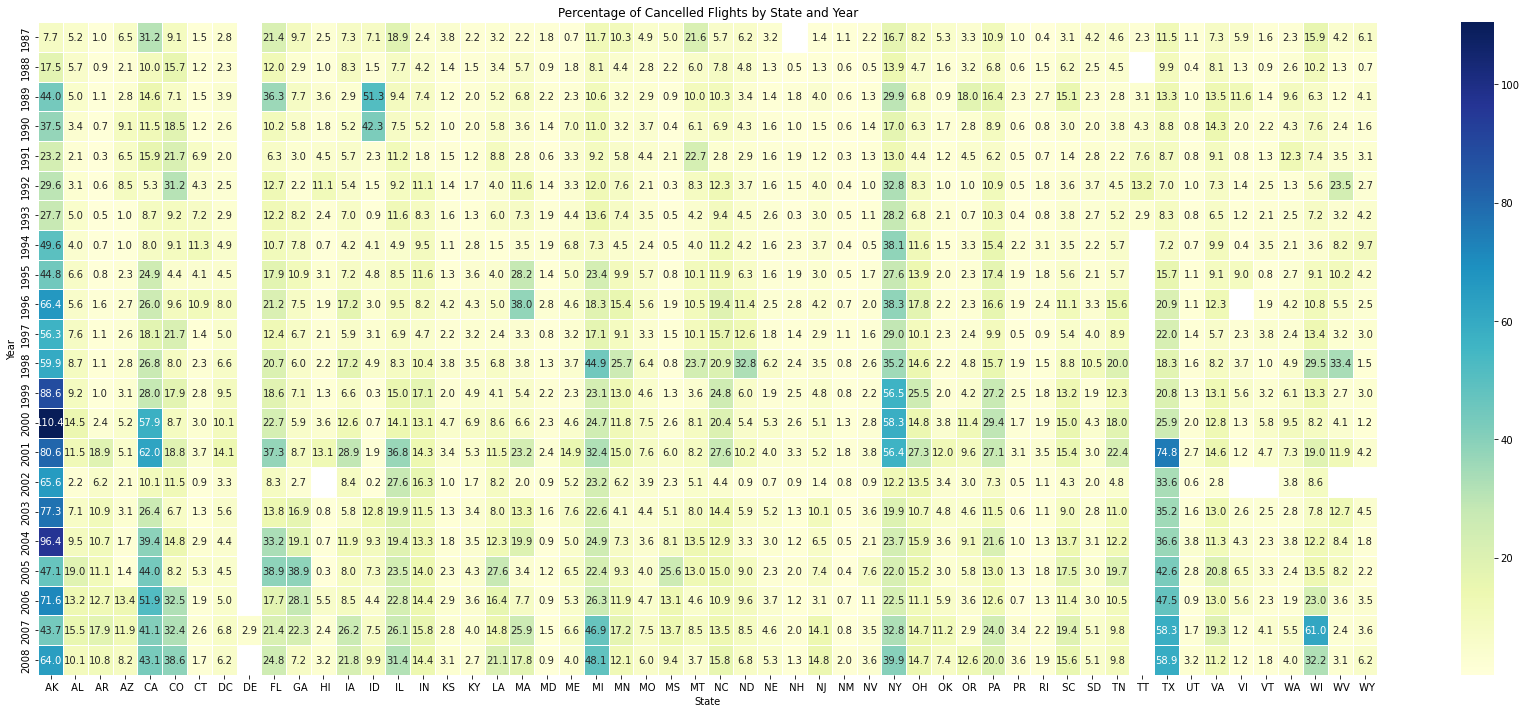

In [86]:
heatmap_data = merged_df.pivot_table(index='Date', columns='DestState', values='Percentage of cancelled', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(30, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Percentage of Cancelled Flights by State and Year')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()

In [71]:
merged_df.sort_values(by=['DestState', 'Date'])

,Date,Dest,DestAirportName,DestState,Cancelled Flights,Noncancelled Flights,Total Flights,Percentage of cancelled
5,1987,ANC,Ted Stevens Anchorage International,AK,3,251,254,1.181102
85,1987,JNU,Juneau International,AK,2,44,46,4.347826
86,1987,KTN,Ketchikan International,AK,1,45,46,2.173913
173,1988,ANC,Ted Stevens Anchorage International,AK,11,1111,1122,0.980392
226,1988,FAI,Fairbanks International,AK,4,280,284,1.408451
...,...,...,...,...,...,...,...,...
4170,2007,JAC,Jackson Hole,WY,6,266,272,2.205882
4364,2008,CPR,Casper/Natrona County International,WY,2,204,206,0.970874
4402,2008,GCC,Gillette Campbell County,WY,1,87,88,1.136364
4435,2008,JAC,Jackson Hole,WY,4,286,290,1.379310


### Analysing based on Origin States

In [64]:
cancelled_df3 = cancelled_df.groupby([cancelled_df['Date'].dt.year, 'Origin', 'OriginAirportName', 'OriginState']).size()
cancelled_df3 = cancelled_df3.reset_index(name='Cancelled Flights')
cancelled_df3

,Date,Origin,OriginAirportName,OriginState,Cancelled Flights
0,1987,ABE,Lehigh Valley International,PA,1
1,1987,ABQ,Albuquerque International Sunport,NM,9
2,1987,AGS,Augusta Regional at Bush Field,GA,1
3,1987,ALB,Albany International,NY,1
4,1987,AMA,Rick Husband Amarillo International,TX,1
...,...,...,...,...,...
4603,2008,VLD,Valdosta Regional,GA,1
4604,2008,VPS,Eglin AFB Destin Fort Walton Beach,FL,8
4605,2008,WRG,Wrangell Airport,AK,2
4606,2008,XNA,Northwest Arkansas Regional,AR,33


In [65]:
noncancelled_df3 = noncancelled_df.groupby([noncancelled_df['Date'].dt.year, 'Origin', 'OriginAirportName', 'OriginState']).size()
noncancelled_df3 = noncancelled_df3.reset_index(name='Noncancelled Flights')
noncancelled_df3

,Date,Origin,OriginAirportName,OriginState,Noncancelled Flights
0,1987,ABE,Lehigh Valley International,PA,114
1,1987,ABQ,Albuquerque International Sunport,NM,631
2,1987,ACV,California Redwood Coast Humboldt County,CA,19
3,1987,AGS,Augusta Regional at Bush Field,GA,79
4,1987,ALB,Albany International,NY,244
...,...,...,...,...,...
5130,2008,WRG,Wrangell Airport,AK,61
5131,2008,WYS,Yellowstone,MT,22
5132,2008,XNA,Northwest Arkansas Regional,AR,1075
5133,2008,YAK,Yakutat Airport,AK,58


In [66]:
merged_df2 = pd.merge(cancelled_df3, noncancelled_df3, how='left', on=['Date', 'Origin', 'OriginAirportName', 'OriginState'])
merged_df2

,Date,Origin,OriginAirportName,OriginState,Cancelled Flights,Noncancelled Flights
0,1987,ABE,Lehigh Valley International,PA,1,114
1,1987,ABQ,Albuquerque International Sunport,NM,9,631
2,1987,AGS,Augusta Regional at Bush Field,GA,1,79
3,1987,ALB,Albany International,NY,1,244
4,1987,AMA,Rick Husband Amarillo International,TX,1,155
...,...,...,...,...,...,...
4603,2008,VLD,Valdosta Regional,GA,1,91
4604,2008,VPS,Eglin AFB Destin Fort Walton Beach,FL,8,556
4605,2008,WRG,Wrangell Airport,AK,2,61
4606,2008,XNA,Northwest Arkansas Regional,AR,33,1075


In [68]:
merged_df2['Total Flights'] = merged_df2['Cancelled Flights'] + merged_df2['Noncancelled Flights']
merged_df2

,Date,Origin,OriginAirportName,OriginState,Cancelled Flights,Noncancelled Flights,Total Flights
0,1987,ABE,Lehigh Valley International,PA,1,114,115
1,1987,ABQ,Albuquerque International Sunport,NM,9,631,640
2,1987,AGS,Augusta Regional at Bush Field,GA,1,79,80
3,1987,ALB,Albany International,NY,1,244,245
4,1987,AMA,Rick Husband Amarillo International,TX,1,155,156
...,...,...,...,...,...,...,...
4603,2008,VLD,Valdosta Regional,GA,1,91,92
4604,2008,VPS,Eglin AFB Destin Fort Walton Beach,FL,8,556,564
4605,2008,WRG,Wrangell Airport,AK,2,61,63
4606,2008,XNA,Northwest Arkansas Regional,AR,33,1075,1108


In [69]:
merged_df2['Percentage of cancelled'] = merged_df2['Cancelled Flights'] / merged_df2['Total Flights'] * 100
merged_df2

,Date,Origin,OriginAirportName,OriginState,Cancelled Flights,Noncancelled Flights,Total Flights,Percentage of cancelled
0,1987,ABE,Lehigh Valley International,PA,1,114,115,0.869565
1,1987,ABQ,Albuquerque International Sunport,NM,9,631,640,1.406250
2,1987,AGS,Augusta Regional at Bush Field,GA,1,79,80,1.250000
3,1987,ALB,Albany International,NY,1,244,245,0.408163
4,1987,AMA,Rick Husband Amarillo International,TX,1,155,156,0.641026
...,...,...,...,...,...,...,...,...
4603,2008,VLD,Valdosta Regional,GA,1,91,92,1.086957
4604,2008,VPS,Eglin AFB Destin Fort Walton Beach,FL,8,556,564,1.418440
4605,2008,WRG,Wrangell Airport,AK,2,61,63,3.174603
4606,2008,XNA,Northwest Arkansas Regional,AR,33,1075,1108,2.978339


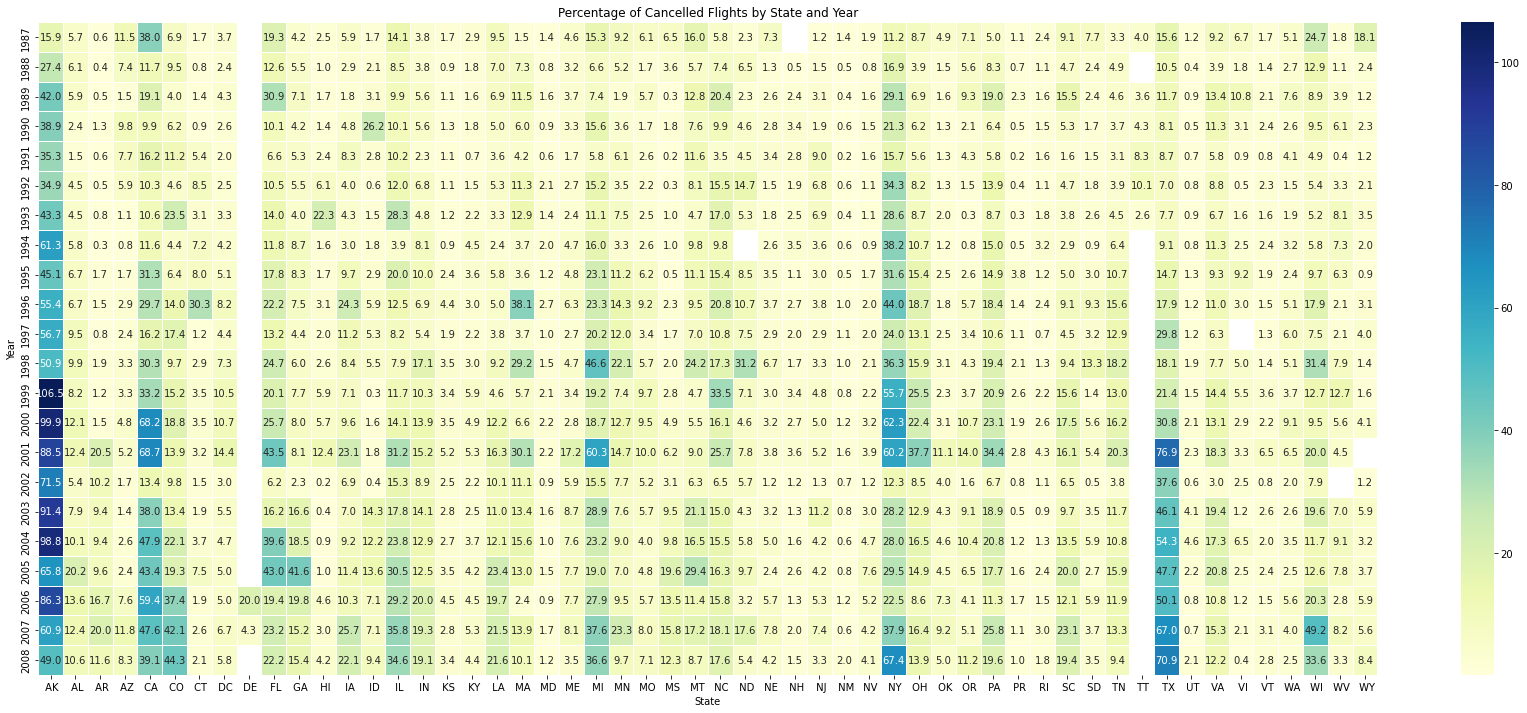

In [87]:
heatmap_data2 = merged_df2.pivot_table(index='Date', columns='OriginState', values='Percentage of cancelled', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(30, 12))
sns.heatmap(heatmap_data2, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Percentage of Cancelled Flights by State and Year')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()

In [78]:
print(merged_df2['OriginState'].unique())

[' PA' ' NM' ' GA' ' NY' ' TX' ' AK' ' WI' ' MI' ' CT' ' CA' ' ME' ' AL'
 ' MT' ' ND' ' TN' ' ID' ' MA' ' LA' ' VT' ' MD' ' SC' ' OH' ' IA' ' NC'
 ' IL' ' CO' ' WY' ' FL' ' DC' ' MN' ' OR' ' IN' ' NJ' ' AZ' ' SD' ' WA'
 ' MS' ' HI' ' WV' ' KS' ' NV' ' KY' ' AR' ' NE' ' VA' ' MO' ' OK' ' RI'
 ' PR' ' UT' ' TT' ' VI' ' NH' ' DE']


In [82]:
ny_2001_rows = merged_df2[(merged_df2['OriginState'] == ' NY') & (merged_df2['Date'] == 2001)]
print(ny_2001_rows)


      Date Origin                 OriginAirportName OriginState  \
2651  2001    ALB              Albany International          NY   
2674  2001    BUF     Buffalo Niagara International          NY   
2703  2001    ELM           Elmira/Corning Regional          NY   
2734  2001    HPN                Westchester County          NY   
2742  2001    ISP             Long Island MacArthur          NY   
2743  2001    ITH          Ithaca Tompkins Regional          NY   
2747  2001    JFK     John F. Kennedy International          NY   
2758  2001    LGA                         LaGuardia          NY   
2816  2001    ROC   Greater Rochester International          NY   
2843  2001    SWF    New York Stewart International          NY   
2844  2001    SYR    Syracuse Hancock International          NY   

      Cancelled Flights  Noncancelled Flights  Total Flights  \
2651                 40                  1221           1261   
2674                 72                  1565           1637   
270

In [77]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4608 entries, 0 to 4607
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     4608 non-null   int64  
 1   Origin                   4608 non-null   object 
 2   OriginAirportName        4608 non-null   object 
 3   OriginState              4608 non-null   object 
 4   Cancelled Flights        4608 non-null   int64  
 5   Noncancelled Flights     4608 non-null   int64  
 6   Total Flights            4608 non-null   int64  
 7   Percentage of cancelled  4608 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 324.0+ KB


In [63]:
cancelled_df_2001

,ActualElapsedTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,CarrierDelay,LateAircraftDelay,SecurityDelay,WeatherDelay,NASDelay,...,OriginAirportName,OriginState,Dest,DestAirportName,DestState,TailNum,UniqueCarrier,CarrierName,FlightNum,Date
97631,NaN,1110,945,85.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Pittsburgh International,PA,CLT,Charlotte Douglas International,NC,äNKNOæ,US,US Airways Inc.,338,2001-01-01
97632,NaN,1953,1814,99.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Midland International Air and Space Port,TX,DFW,Dallas/Fort Worth International,TX,äNKNOæ,MQ,Envoy Air,3630,2001-01-01
97633,NaN,1254,1119,95.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Phoenix Sky Harbor International,AZ,SLC,Salt Lake City International,UT,N335Aæ,HP,NaN,2457,2001-01-01
97634,NaN,1534,1424,70.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Dallas/Fort Worth International,TX,MAF,Midland International Air and Space Port,TX,äNKNOæ,MQ,Envoy Air,3555,2001-01-01
97635,NaN,1220,1105,75.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Dallas/Fort Worth International,TX,TUL,Tulsa International,OK,äNKNOæ,MQ,Envoy Air,3821,2001-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116287,NaN,1909,1718,111.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ANC,Ted Stevens Anchorage International,AK,äNKNOæ,AS,Alaska Airlines Inc.,23,2001-12-30
116288,NaN,906,700,66.0,NaN,NaN,NaN,NaN,NaN,NaN,...,McCarran International,NV,PHX,Phoenix Sky Harbor International,AZ,N636Aæ,HP,NaN,820,2001-12-30
116289,NaN,1910,1548,142.0,NaN,NaN,NaN,NaN,NaN,NaN,...,St Louis Lambert International,MO,PHL,Philadelphia International,PA,äNKNOæ,US,US Airways Inc.,297,2001-12-31
116290,NaN,1029,845,164.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Chicago O'Hare International,IL,EGE,Eagle County Regional,CO,äNKNOæ,AA,American Airlines Inc.,2375,2001-12-31
